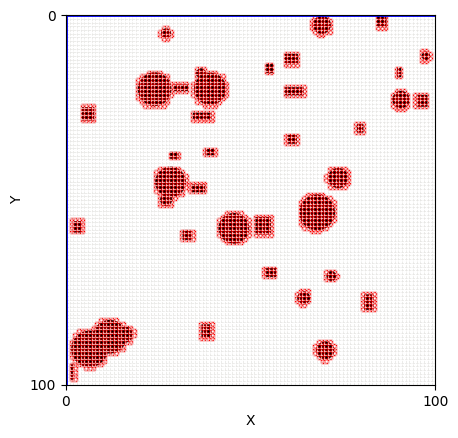

In [1]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time
from eval_metrics import cal_bend, cal_path_length

map = Map(image_path='./generated_images/generated_image_15.png', grid_size=10)
map.draw_coordinate_system()

In [2]:
initial=(0,0)
goal=(map.x_lim - 1, map.y_lim -1)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 482
Elapsed Time: 0.010769844055175781 seconds
Bends:  7
Path length:  145.27922061357847


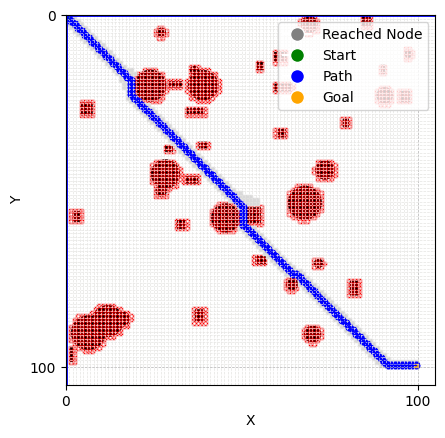

In [3]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")
states = path_states(node)

print("Bends: ", cal_bend(states))
print("Path length: ", cal_path_length(states))

map.draw_path_found(states, initial, goal, explorer.get_reached())

Reached:  466
Elapsed Time: 0.006406068801879883 seconds
Bends:  7
Path length:  145.27922061357847


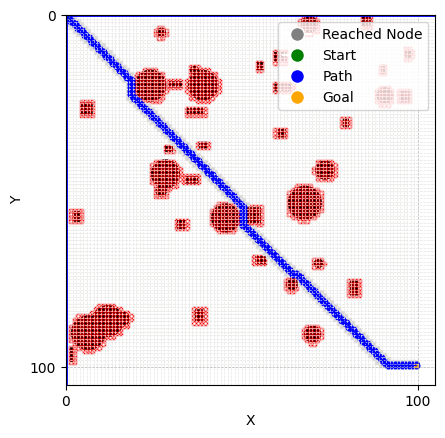

In [4]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
path = path_states(node)

print("Reached: ", len(explorer.reached.keys()))
print(f"Elapsed Time: {elapsed_time} seconds")
print("Bends: ", cal_bend(path))
print("Path length: ", cal_path_length(path))
map.draw_path_found(path, initial, goal, explorer.get_reached())

Reached:  466
Elapsed Time: 1.6175739765167236 seconds
Bends:  8
Path length:  141.92326475597918


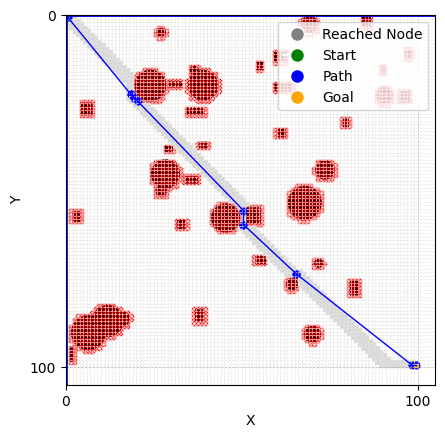

In [5]:
from path_smooth.path_smooth import simplify_path
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
path = path_states(node)
simplified_path = simplify_path(path, map)
end_time = time.time()

print("Reached: ", len(explorer.reached.keys()))
print(f"Elapsed Time: {end_time - start_time} seconds")
print("Bends: ", cal_bend(simplified_path))
print("Path length: ", cal_path_length(simplified_path))
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

Finish Ant colony optimization, size of initial population:  40
------------Generation 1 -----------------
Population size:  40
Before selection, population size:  40
After selection, population size:  39
Before crossover, two first parents: 
[0, 101, 201, 301, 402, 502, 603, 503, 604, 703, 804, 903, 902, 901, 900, 801, 702, 602, 701, 800, 700, 600, 601, 500, 401, 302, 403, 304, 205, 206, 207, 208, 108, 209, 309, 210, 310, 311, 211, 312, 412, 413, 514, 414, 513, 512, 612, 713, 814, 813, 712, 611, 710, 709, 608, 607, 606, 705, 704, 803, 904, 1005, 1105, 1104, 1204, 1304, 1203, 1102, 1002, 1103, 1004, 905, 805, 806, 706, 807, 907, 908, 809, 810, 811, 812, 913, 1013, 914, 1015, 1116, 1017, 1117, 1217, 1318, 1417, 1517, 1616, 1717, 1716, 1816, 1917, 1817, 1818, 1718, 1617, 1518, 1419, 1519, 1618, 1619, 1520, 1521, 1422, 1421, 1321, 1320, 1420, 1319, 1418, 1317, 1216, 1115, 1016, 915, 1014, 1113, 1114, 1213, 1214, 1315, 1414, 1513, 1412, 1511, 1611, 1710, 1811, 1911, 2010, 2110, 2211, 2112,

/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:15: RuntimeWarning: invalid value encountered in arccos
  angle_radians = np.arccos(cosine_theta)


After deletion: [0, 2314, 3519, 3927, 3932, 3336, 3542, 5249, 5450, 6050, 6756, 6857, 7369, 8376, 9999]
Mean fit_value:  -29389.302652061906
Mean path_value:  168.8937040316666
Mean smooth_value:  260.1142857142857
Best path:  [0, 2314, 2919, 3542, 5156, 6062, 7369, 8079, 9999]
------------Generation 6 -----------------
Population size:  35
Before selection, population size:  35
After selection, population size:  34
Before crossover, two first parents: 
[0, 2314, 4119, 4124, 4025, 3932, 3846, 5251, 5359, 7362, 7371, 8079, 9999]
[0, 2317, 3417, 3541, 5249, 5450, 6050, 6784, 9999]
After crossover, two first parents: 
[0, 2314, 4119, 4124, 4025, 3932, 3846, 5251, 5359, 7362, 7371, 8079, 9999]
[0, 2317, 3417, 3541, 5249, 5450, 6050, 6784, 9999]
Before mutation: [0, 2314, 4119, 4124, 4025, 3932, 3846, 5251, 5359, 7362, 7371, 8079, 9999]
After mutation: [0, 2311, 2519, 3631, 3931, 3841, 5254, 5356, 6061, 6888, 9999]
Before insertion: [0, 2311, 2519, 3631, 3931, 3841, 5254, 5356, 6061, 6888, 

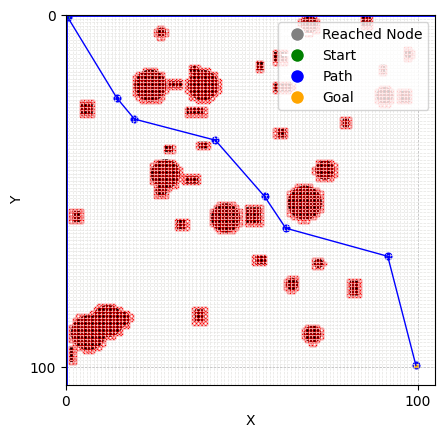

In [8]:
from genetic.genetic import genetic
from genetic.genetic import convert_path_to_xy
G = map.get_grid_matrix()
cols = G.shape[1]
start_time = time.time()
mean_path_value, mean_smooth_value, mean_fit_value, best_path = genetic(map, start=initial, end=goal,
                max_generation=10, ant_number=10, 
                p_crossover=0.8, p_mutation=0.05, verbose=True)
end_time = time.time()
path = convert_path_to_xy(best_path[-1], cols)
print("Elapsed time: ", end_time-start_time)
print("Bends: ", cal_bend(path))
print("Path length: ", cal_path_length(path))
map.draw_path_found(convert_path_to_xy(best_path[-1], cols), initial, goal, [])
